/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for l

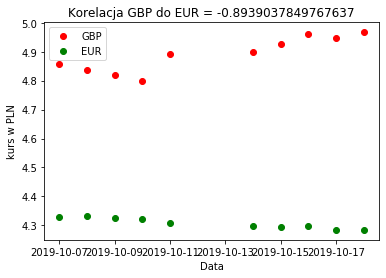

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

print('Klucze dostępne w zbiorze danych: ', boston_nieruchomosci.keys())
print(boston_nieruchomosci.DESCR)


In [3]:
print('Przykładowe wartości cech:\n', boston_nieruchomosci.data[:1])
print('Przykładowe kwoty: ', boston_nieruchomosci.target[:3])

Przykładowe wartości cech:
 [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
Przykładowe kwoty:  [24.  21.6 34.7]


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


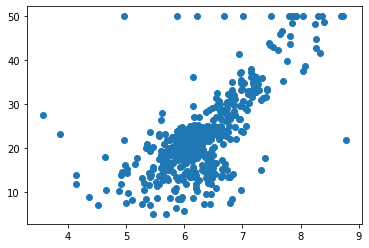

In [10]:
# Dużo zmiennych... na początek spróbujmy z jedną
l_pokoi = boston_nieruchomosci['data'][:, np.newaxis, 5]
plt.scatter(l_pokoi, boston_nieruchomosci['target'])
plt.show()

Metryka domyślna:  0.5134501512003116
Metryka r2:  0.5134501512003116
Współczynniki regresji:
 [8.92735664]


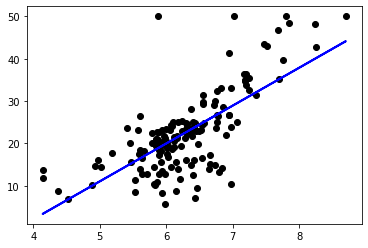

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(l_pokoi, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [13]:
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score

cv_score_r2 = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='r2')
print(cv_score_r2)

# używamy innej metryki 
# dokumentacja:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

# ...i jeszcze innej
cv_score_mse = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)

[ 0.70708692  0.63476138  0.50385441 -0.21594318 -1.77736913]
[ 0.70944924  0.69763179  0.7704844  -0.2159426  -0.50013497]
[ -10.11581024  -33.25013827  -39.73491255 -106.6526283   -73.84557039]


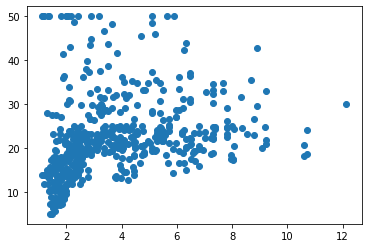

Metryka domyślna:  0.0405636942100297
Metryka r2:  0.0405636942100297
Współczynniki regresji:
 [1.13203352]


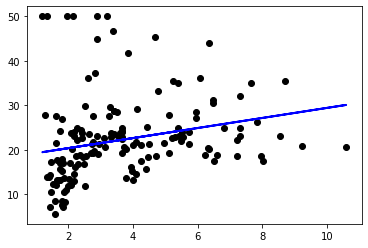

In [16]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.
# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.

employment_centres = boston_nieruchomosci['data'][:, np.newaxis, 7]
plt.scatter(employment_centres, boston_nieruchomosci['target'])
plt.show()

# Stworzenie regresora liniowego
linreg1 = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(employment_centres, boston_nieruchomosci['target'], test_size = 0.3)

linreg1.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg1.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg1.score(X_test, y_test))

# wskaźnik (metryka) r^2
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg1.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()




In [15]:
cv_r2 = cross_val_score(linreg1, employment_centres, boston_nieruchomosci.target, cv=5, scoring='r2')
print(cv_r2)

[-1.79151691e-01  5.72171651e-04 -9.19171854e-01 -1.09544022e-01
 -1.77762058e+00]
